<a href="https://colab.research.google.com/github/marcvonrohr/machine_learning/blob/main/lab_103/lab_103_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="center" style="max-width: 900px; height: auto" src="https://github.com/HSG-AIML-Teaching/ML2025-Lab/blob/main/lab_103/banner.png?raw=1">

<img align="right" style="max-width: 200px; height: auto" src="https://github.com/HSG-AIML-Teaching/ML2025-Lab/blob/main/lab_103/hsg_logo.png?raw=1">

###  Lab 103 - NumPy, Pillow, and Matplotlib

8,860,1.00 Machine Learning, Spring Term 2025, University of St.Gallen (HSG)

In our previous lab we learned about **basic Python programming**. In this lab course, we will build on this new knowledge and introduce some modules, techniques, and concepts that we will need in the future for designing and training machine learning and deep learning models.

### Lab Objectives:

After today's lab, you should be able to:
    
> 1. Know about the very basics functionality and usage of the **NumPy Library**.
> 1. Understand the application of the **Pillow Library** to manipulate image data.
> 3. Utilize the basic plotting capabilities of the **Matplotlib Library**.

## 1. The NumPy Library

[NumPy](https://docs.scipy.org/doc/numpy-1.14.0/reference/index.html) is the fundamental package for scientific computing with Python and supports you with numerically and computationally intensive problems. The core of Numpy forms the concept of arrays, which we will learn about next. Building on the concept of arrays, Numpy provides a wide range of mathematical functionality.

### 1.1 NumPy Arrays and Tensors

Lists are useful, but rather memory intensive. If you want to process large amounts of data - like we do in machine learning applications - you want to use your limited memory more efficiently.
Numpy arrays are here to help: they are lists on steroids.

Creating an array is as easy as creating a list:

In [1]:
import numpy as np  # we have to import NumPy first

l = [0, 1, 2]   # this is a list
a = np.array(l) # this is an array
a

array([0, 1, 2])

You can create an array from a list, or you can use the NumPy equivalent of `range`:

In [2]:
a = np.arange(0, 3, 1)
a

array([0, 1, 2])

The first big difference between lists and arrays is that all elements in an array **must** be of the same data type (list elements can have different data types, though). As a result, an array has a data type attribute:

In [3]:
#type(a)
a.dtype

dtype('int64')

In this case, the data type is 64-bit integer, which is a derivate of the integer we already met as a basic data type.

Arrays are able to perform element-wise operations:

In [4]:
print(a + 1)  # element-wise addition
print(a - 4)  # element-wise subtraction
print(a * 2)  # element-wise multiplication
print(a ** 2)  # element-wise exponentiation
#print(l+1)   # a list cannot do this

[1 2 3]
[-4 -3 -2]
[0 2 4]
[0 1 4]


Some operations may require your array to adopt a different datatype. Python will do that for you:

In [5]:
print(a/2)
print((a/2).dtype)

[0.  0.5 1. ]
float64


Indexing and slicing work the exact same way as for lists:

In [6]:
print(a[0])
print(a[:2])
print(a[-1])
print(a[::-1])  # reverse array by using a step size of -1

0
[0 1]
2
[2 1 0]


You can also use arithmetic operations involving two arrays:

In [7]:
#print(a + np.array([1, 2, 3]))
print(l + [1, 2, 3])  # in the case of lists, this will concatenate the two lists

[0, 1, 2, 1, 2, 3]


You can consider a one-dimensional array as a **vector**. But arrays are not limited to one dimension. You can create a two-dimensional array, which you can then consider as a **matrix**:

In [8]:
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Everything we learned about arrays so far holds up for two-dimensional arrays:

In [9]:
print(m[0])       # the first element of m is a one-dimensional array
print(m[:, 1])    # the first element of each row
print(m + 1)      # element-wise addition
print(m * a)      # multiply vector a with each row of matrix m

[1 2 3]
[2 5 8]
[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]
[[ 0  2  6]
 [ 0  5 12]
 [ 0  8 18]]


Please note the notation in line 2: `m[:, 0]`
This might look weird to you, but it's easy to explain what happens here: in a two-dimensional array, you have one index for each dimension. In `[:, 0]`, `:` refers to the first dimension (the rows) and `0` refers to the second dimension (the columns). Thus, it retrieves the element in the first column for each row. If you have additional (n) dimensions, the same logic applies, which gives you a powerful tool to easily access data in your arrays.

Since arrays can be multi-dimensional, you can easily check their shape in the different dimensions:

In [10]:
m.shape

(3, 3)

Arrays can be easily reshaped:

In [11]:
m.reshape(1, 9)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

For long arrays it can be a hassle to figure out the exact dimensions if you want to reshape an Array. Numpy will help you if know all but one of the dimensions that your resulting Array should be in. In that case, you can replace the missing dimension with `-1`. For instance, the previous command can be written as:

In [12]:
m.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Ok, that's all nice. But what is Numpy's other selling point? It is fast. Let me show you just how fast.
Let's assume you have a long list and want to change every element in that list. This will take a while:

In [13]:
l = range(10000000)
l2 = []
for x in l:
    l2.append(x+1)
l2

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

If you try the same in NumPy, you can do it in fewer lines of code and with much faster runtime:

In [14]:
a = np.arange(100000000)
a+1

array([        1,         2,         3, ...,  99999998,  99999999,
       100000000])

NumPy is so much fast since it vectorizes computations: it applies the operation on each element of an array at the same time. This is possible since NumPy uses C implementations in the background. You, as a user, benefit from the speed of C and the simplicity of Python at the same time.

Finally, in the next lab courses we will be dealing with tensors. A **tensor**, mathematically, is just an n-dimensional array. In terms of programming, we will be using the Python module `pytorch`, which implements tensors (NumPy arrays can be used as tensors, too, but we prefer to use pytorch tensors for a reason that we will explain later to you). The good thing for you is that pytorch tensors work exactly like NumPy arrays:

In [15]:
import torch

a = torch.tensor([1, 2, 3])

print(a + 1)  # element-wise addition
print(a * 2)  # element-wise multiplication
print(a[2])   # indexing
print(a[1:])  # slicing

b = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(b)

tensor([2, 3, 4])
tensor([2, 4, 6])
tensor(3)
tensor([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


## 2. The Pillow Library

The **"Python Imaging Library (Pillow)"** by Alex Clark and contributors (abbreviated as PIL, in newer versions known as Pillow), is a free library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats (https://pillow.readthedocs.io/en/stable/). Using the PIL library in combination with the Numpy library allows for a great deal image analysis and manipulation.

To make an arbitrary image interpretable for a computer images are usually represented by 3D tensors as shown below:

<img align="center" style="max-width: 1000px; height: auto" src="https://github.com/HSG-AIML/LabMLDL/blob/main/lab_02/python_image_processing.png?raw=1">

(Source: **"Learning Perceptual Organization with Minimal Human Supervision"**, Stella Yu, UC Berkeley, 2019.)

Pls. note, that prior to using PIL you need to install the Python Image package. A brief installation instruction can be obtained from: https://pillow.readthedocs.io/en/5.3.x/installation.html. The package can installed via the following command:

In [16]:
!pip3 install pillow

Upon successful installation we can now import the `PIL` and `Scikit-Image` libraries:

In [17]:
# use this statement to show plots inside your notebook
%matplotlib inline

# import the pil, numpy and the matplotlib libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# import the scikit image library
from skimage import io

The `PIL` library supports a wide variety of image file formats. To read files from disk, use the image read `imread` function of the `Scikit-Image` library. You don’t have to know the file format to open a file. The library automatically determines the format based on the contents of the file.

### 2.1. Image Loading and Plotting

Let's open and plot the `halloween.jpg` image file:

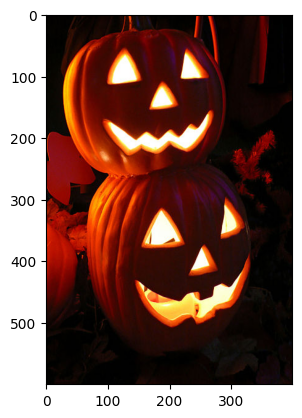

In [18]:
# import the urllib library
from urllib.request import urlopen

# retrieve remote image file
image = Image.open(urlopen("https://raw.githubusercontent.com/HSG-AIML-Teaching/ML2025-Lab/main/lab_103/halloween.jpg"))

# convert to numpy array
image_array = np.asarray(image)

# plot image
plt.imshow(image, vmin=0, vmax=255)

Let's also have a look at the exact shape of the image:

In [19]:
h, w, c = image_array.shape

print(h)   # prints the image height
print(w)   # prints the image width
print(c)   # prints the number of image color channels = 3 for red, green, blue (rgb)

600
400
3


### 2.2. Image Manipulation - Cropping

Use PIL to extract the upper pumpkin of the image:

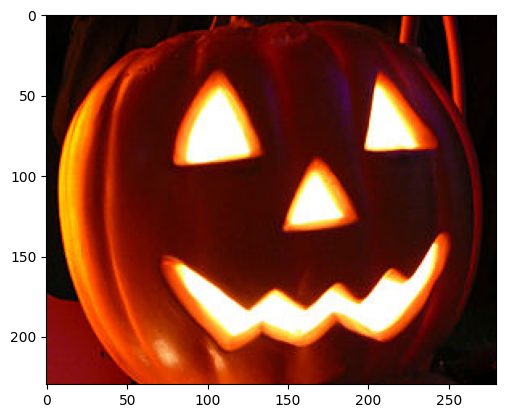

In [20]:
upper_pumpkin = image_array[20:250, 20:300, :]
plt.imshow(upper_pumpkin, vmin=0, vmax=255)

In [21]:
upper_pumpkin.shape

(230, 280, 3)

### 2.3. Image Manipulation - Channel Extraction

Let's extract the distinct (RGB) colour channels of the image:

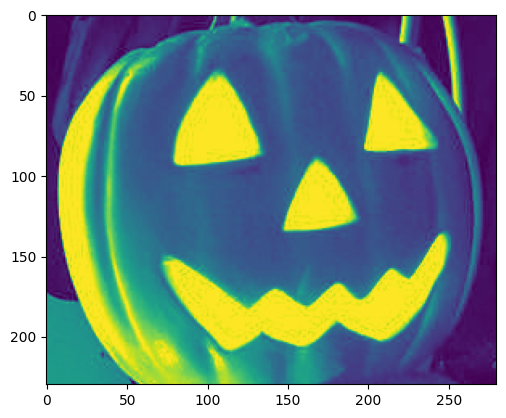

In [22]:
# extraction of the red colour channel
red_channel =  upper_pumpkin[:,:,0]

plt.imshow(red_channel)

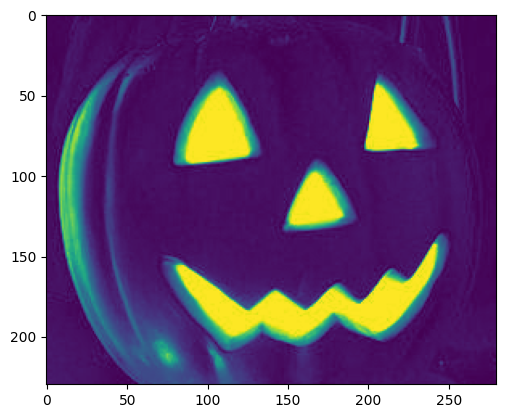

In [23]:
# extraction of the green colour channel
green_channel =  upper_pumpkin[:,:,1]

plt.imshow(green_channel)

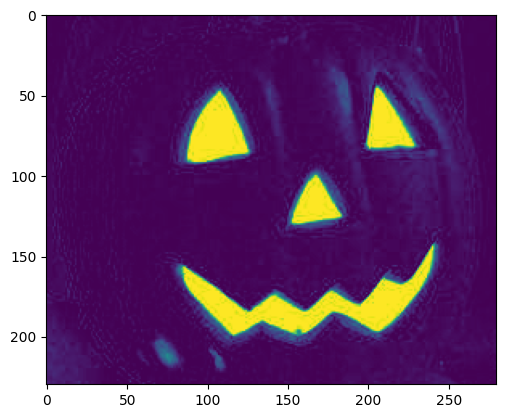

In [24]:
# extraction of a blue colour channel
blue_channel = upper_pumpkin[:,:,2]

plt.imshow(blue_channel)

### 2.3. Image Manipulation - Greyscaling

We can derive the standard deviation of the pixel values across all bands: this will indicate in which image areas there are the most significant differences between the three bands (spoiler: they all have bright eyers, nose, and mouth and the background is dark in all of the channels):

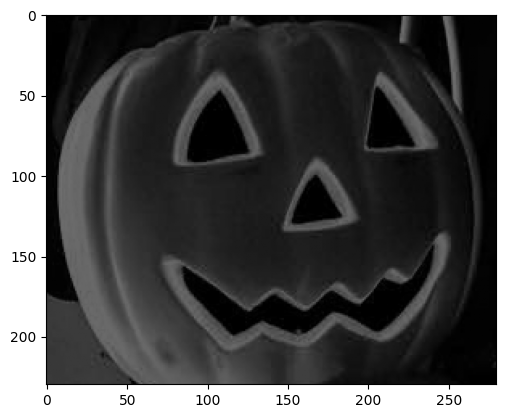

In [25]:
gray = upper_pumpkin.std(axis=2)
plot = plt.imshow(gray, cmap=plt.cm.gray, vmin=0, vmax=255)

We can also subtract image channels from each other:

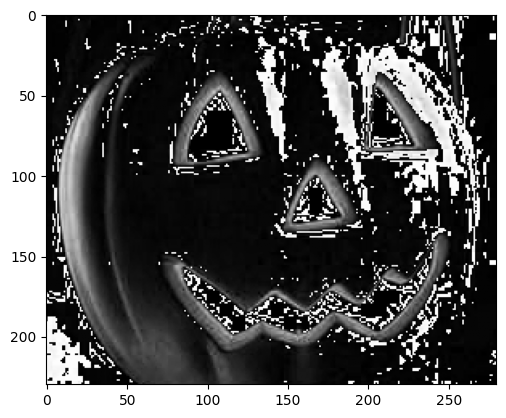

In [26]:
diff = upper_pumpkin[:,:,1]-upper_pumpkin[:,:,2]  # green - blue
plot = plt.imshow(diff, cmap=plt.cm.gray, vmin=0, vmax=255)

To learn more about PIL and its capabilities visit: https://pillow.readthedocs.io.

## 3. The Matplotlib Library

[matplotlib](https://matplotlib.org/) is the standard Python package for plotting data and images. We have already used its `imshow` function to display images (see above). The core task of matplotlib, however, is the plotting of data: line plots, scatter plots, bar plots, etc.
In the following, we will present some example uses for matplotlib.

### 3.1. Line Plots

The most simple plot - a line connecting three points: (0,0), (2, 1), and (5,2) where this notation means (x-coordinate, y-coordinate) -  can be set up as follows:

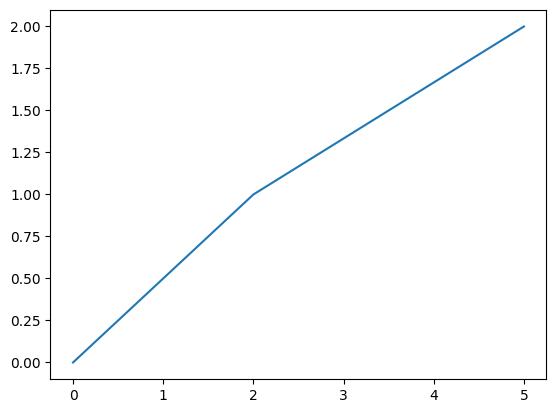

In [27]:
import matplotlib.pyplot as plt  # import matplotlib

x = [0, 2, 5]  # list of x coordinates
y = [0, 1, 2]  # list of y coordinates

plt.plot(x, y)

We can easily add axis labels and a title:

Text(0.5, 1.0, 'Time is Money')

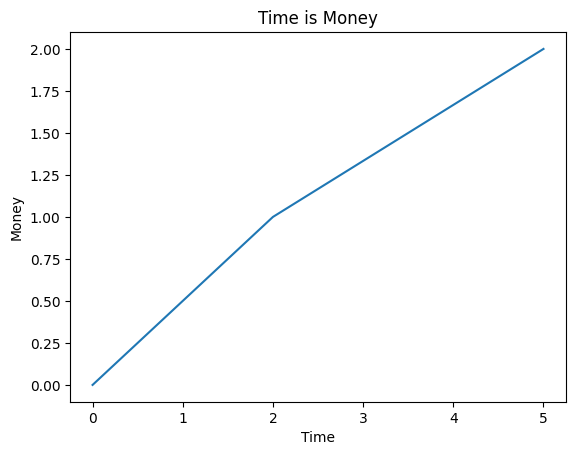

In [28]:
x = [0, 2, 5]
y = [0, 1, 2]

plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Money')
plt.title('Time is Money')

We can also add a second line. In order to be able to distinguish the different data sets, matplotlib will choose a different line color. We can also add plot labels and a legend so we know which line refers to which data set:

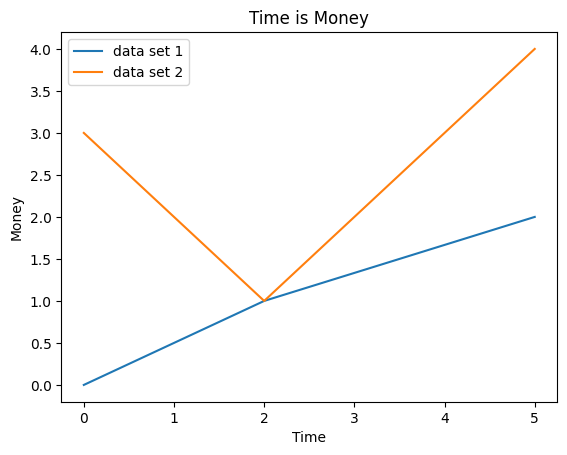

In [29]:
x = [0, 2, 5]
y = [0, 1, 2]
y2 = [3, 1, 4]

plt.plot(x, y, label='data set 1')
plt.plot(x, y2, label='data set 2')
plt.xlabel('Time')
plt.ylabel('Money')
plt.title('Time is Money')
plt.legend()

### 3.2. Scatter Plots

Point clouds can be displayed with scatter plots. You can choose from a wide range of marker types and colors.

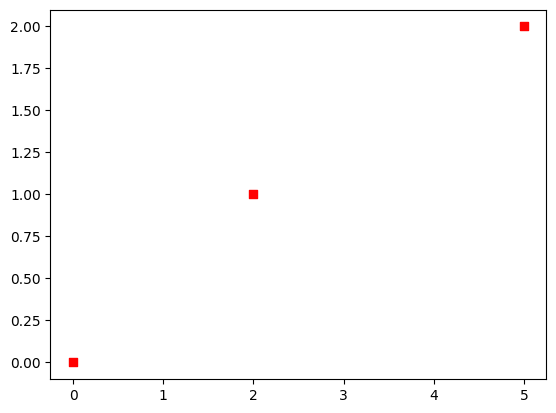

In [30]:
plt.scatter(x, y, color='red', marker='s')  # marker='s': squares

### 3.3. Function Plots

Mathematical functions can be plotted, too. This is typically accomplished by evaluating a function over a range in $x$ to generate $y$ values. The resulting $x$ and $y$ values can then be plotted as before:

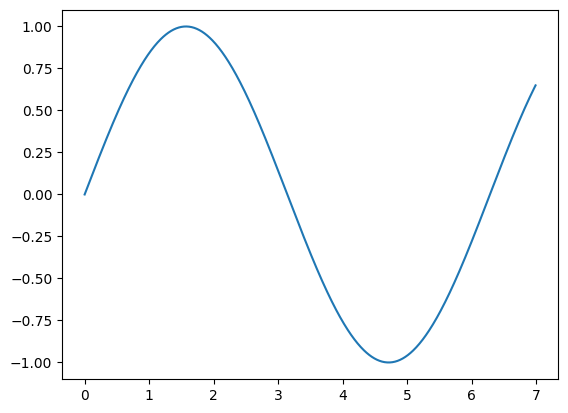

In [31]:
import numpy as np

x = np.arange(0, 7, 0.01)
y = np.sin(x)

plt.plot(x, y)

### Lab Summary:

In this initial lab, a step by step introduction into fundamentals libraries namely `NumPy`, `Pillow` and `Matplotlib` are presented. The code and exercises presented in this lab may serve you as a starting point for more complex and tailored analytics.

You may want to execute the content of your lab outside of the Jupyter notebook environment, e.g., on a compute node or a server. The cell below converts the lab notebook into a standalone and executable python script.

In [32]:
!jupyter nbconvert --to script lab_103_notebook.ipynb

[NbConvertApp] WARNING | pattern 'lab_103_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut